In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy import stats

import scikit_posthocs as sp

from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
df = pd.read_excel("UmamiSalivation.xlsx", sheet_name='Skn1')
fix_het = {df['Genotype'][0]:'Het'}
df = df.replace(fix_het)
df

,Mouse,Sex,Genotype,Location,Tastant,Saliva (mg)
0,24,F,Het,Anterior,H2O,0.23
1,24,F,Het,Anterior,MPG+IMP,0.74
2,24,F,Het,Anterior,50mM Citric Acid,1.23
3,24,F,Het,Posterior,H2O,0.30
4,24,F,Het,Posterior,MPG+IMP,2.18
...,...,...,...,...,...,...
73,23m,M,KO,Anterior,MPG+IMP,0.25
74,23m,M,KO,Anterior,50mM Citric Acid,0.58
75,23m,M,KO,Posterior,H2O,0.47
76,23m,M,KO,Posterior,MPG+IMP,0.44


In [4]:
to_plot = df.copy(deep = True)
to_plot = to_plot.groupby(['Mouse','Genotype','Tastant','Location']).mean()
to_plot.reset_index(inplace=True)
to_plot = to_plot[to_plot['Genotype']!= 'Unknown']
to_plot = to_plot[to_plot['Tastant']!='50mM Citric Acid']
to_plot

,Mouse,Genotype,Tastant,Location,Saliva (mg)
2,17,KO,H2O,Anterior,0.95
3,17,KO,H2O,Posterior,0.29
4,17,KO,MPG+IMP,Anterior,0.03
5,17,KO,MPG+IMP,Posterior,0.00
8,18,KO,H2O,Anterior,0.36
9,18,KO,H2O,Posterior,0.53
10,18,KO,MPG+IMP,Anterior,0.38
11,18,KO,MPG+IMP,Posterior,0.11
14,19,Het,H2O,Anterior,0.89
15,19,Het,H2O,Posterior,0.91


In [5]:
by_loc = to_plot[to_plot['Location']=='Anterior'][['Mouse','Genotype','Tastant','Location']]
by_loc['Posterior'] = to_plot[to_plot['Location']=='Posterior']['Saliva (mg)'].tolist()
by_loc['Anterior'] = to_plot[to_plot['Location']=='Anterior']['Saliva (mg)'].tolist()
by_loc['Difference'] = by_loc['Posterior']-by_loc['Anterior']
by_loc

,Mouse,Genotype,Tastant,Location,Posterior,Anterior,Difference
2,17,KO,H2O,Anterior,0.29,0.95,-0.66
4,17,KO,MPG+IMP,Anterior,0.00,0.03,-0.03
8,18,KO,H2O,Anterior,0.53,0.36,0.17
10,18,KO,MPG+IMP,Anterior,0.11,0.38,-0.27
14,19,Het,H2O,Anterior,0.91,0.89,0.02
16,19,Het,MPG+IMP,Anterior,1.79,1.26,0.53
20,20,KO,H2O,Anterior,0.30,0.48,-0.18
22,20,KO,MPG+IMP,Anterior,0.25,0.12,0.13
26,21,Het,H2O,Anterior,1.11,0.92,0.19
28,21,Het,MPG+IMP,Anterior,1.34,1.05,0.29


In [6]:
by_tast = to_plot[to_plot['Tastant']=='H2O'][['Mouse', 'Genotype', 'Location']]
by_tast['H2O'] = to_plot[to_plot['Tastant']=='H2O']['Saliva (mg)'].tolist()
by_tast['Umami'] = to_plot[to_plot['Tastant']=='MPG+IMP']['Saliva (mg)'].tolist()
by_tast['Difference'] = by_tast['Umami'] - by_tast['H2O']
by_tast

,Mouse,Genotype,Location,H2O,Umami,Difference
2,17,KO,Anterior,0.95,0.03,-0.92
3,17,KO,Posterior,0.29,0.00,-0.29
8,18,KO,Anterior,0.36,0.38,0.02
9,18,KO,Posterior,0.53,0.11,-0.42
14,19,Het,Anterior,0.89,1.26,0.37
15,19,Het,Posterior,0.91,1.79,0.88
20,20,KO,Anterior,0.48,0.12,-0.36
21,20,KO,Posterior,0.30,0.25,-0.05
26,21,Het,Anterior,0.92,1.05,0.13
27,21,Het,Posterior,1.11,1.34,0.23


In [7]:
def color(number):
    return sns.color_palette('colorblind')[number]

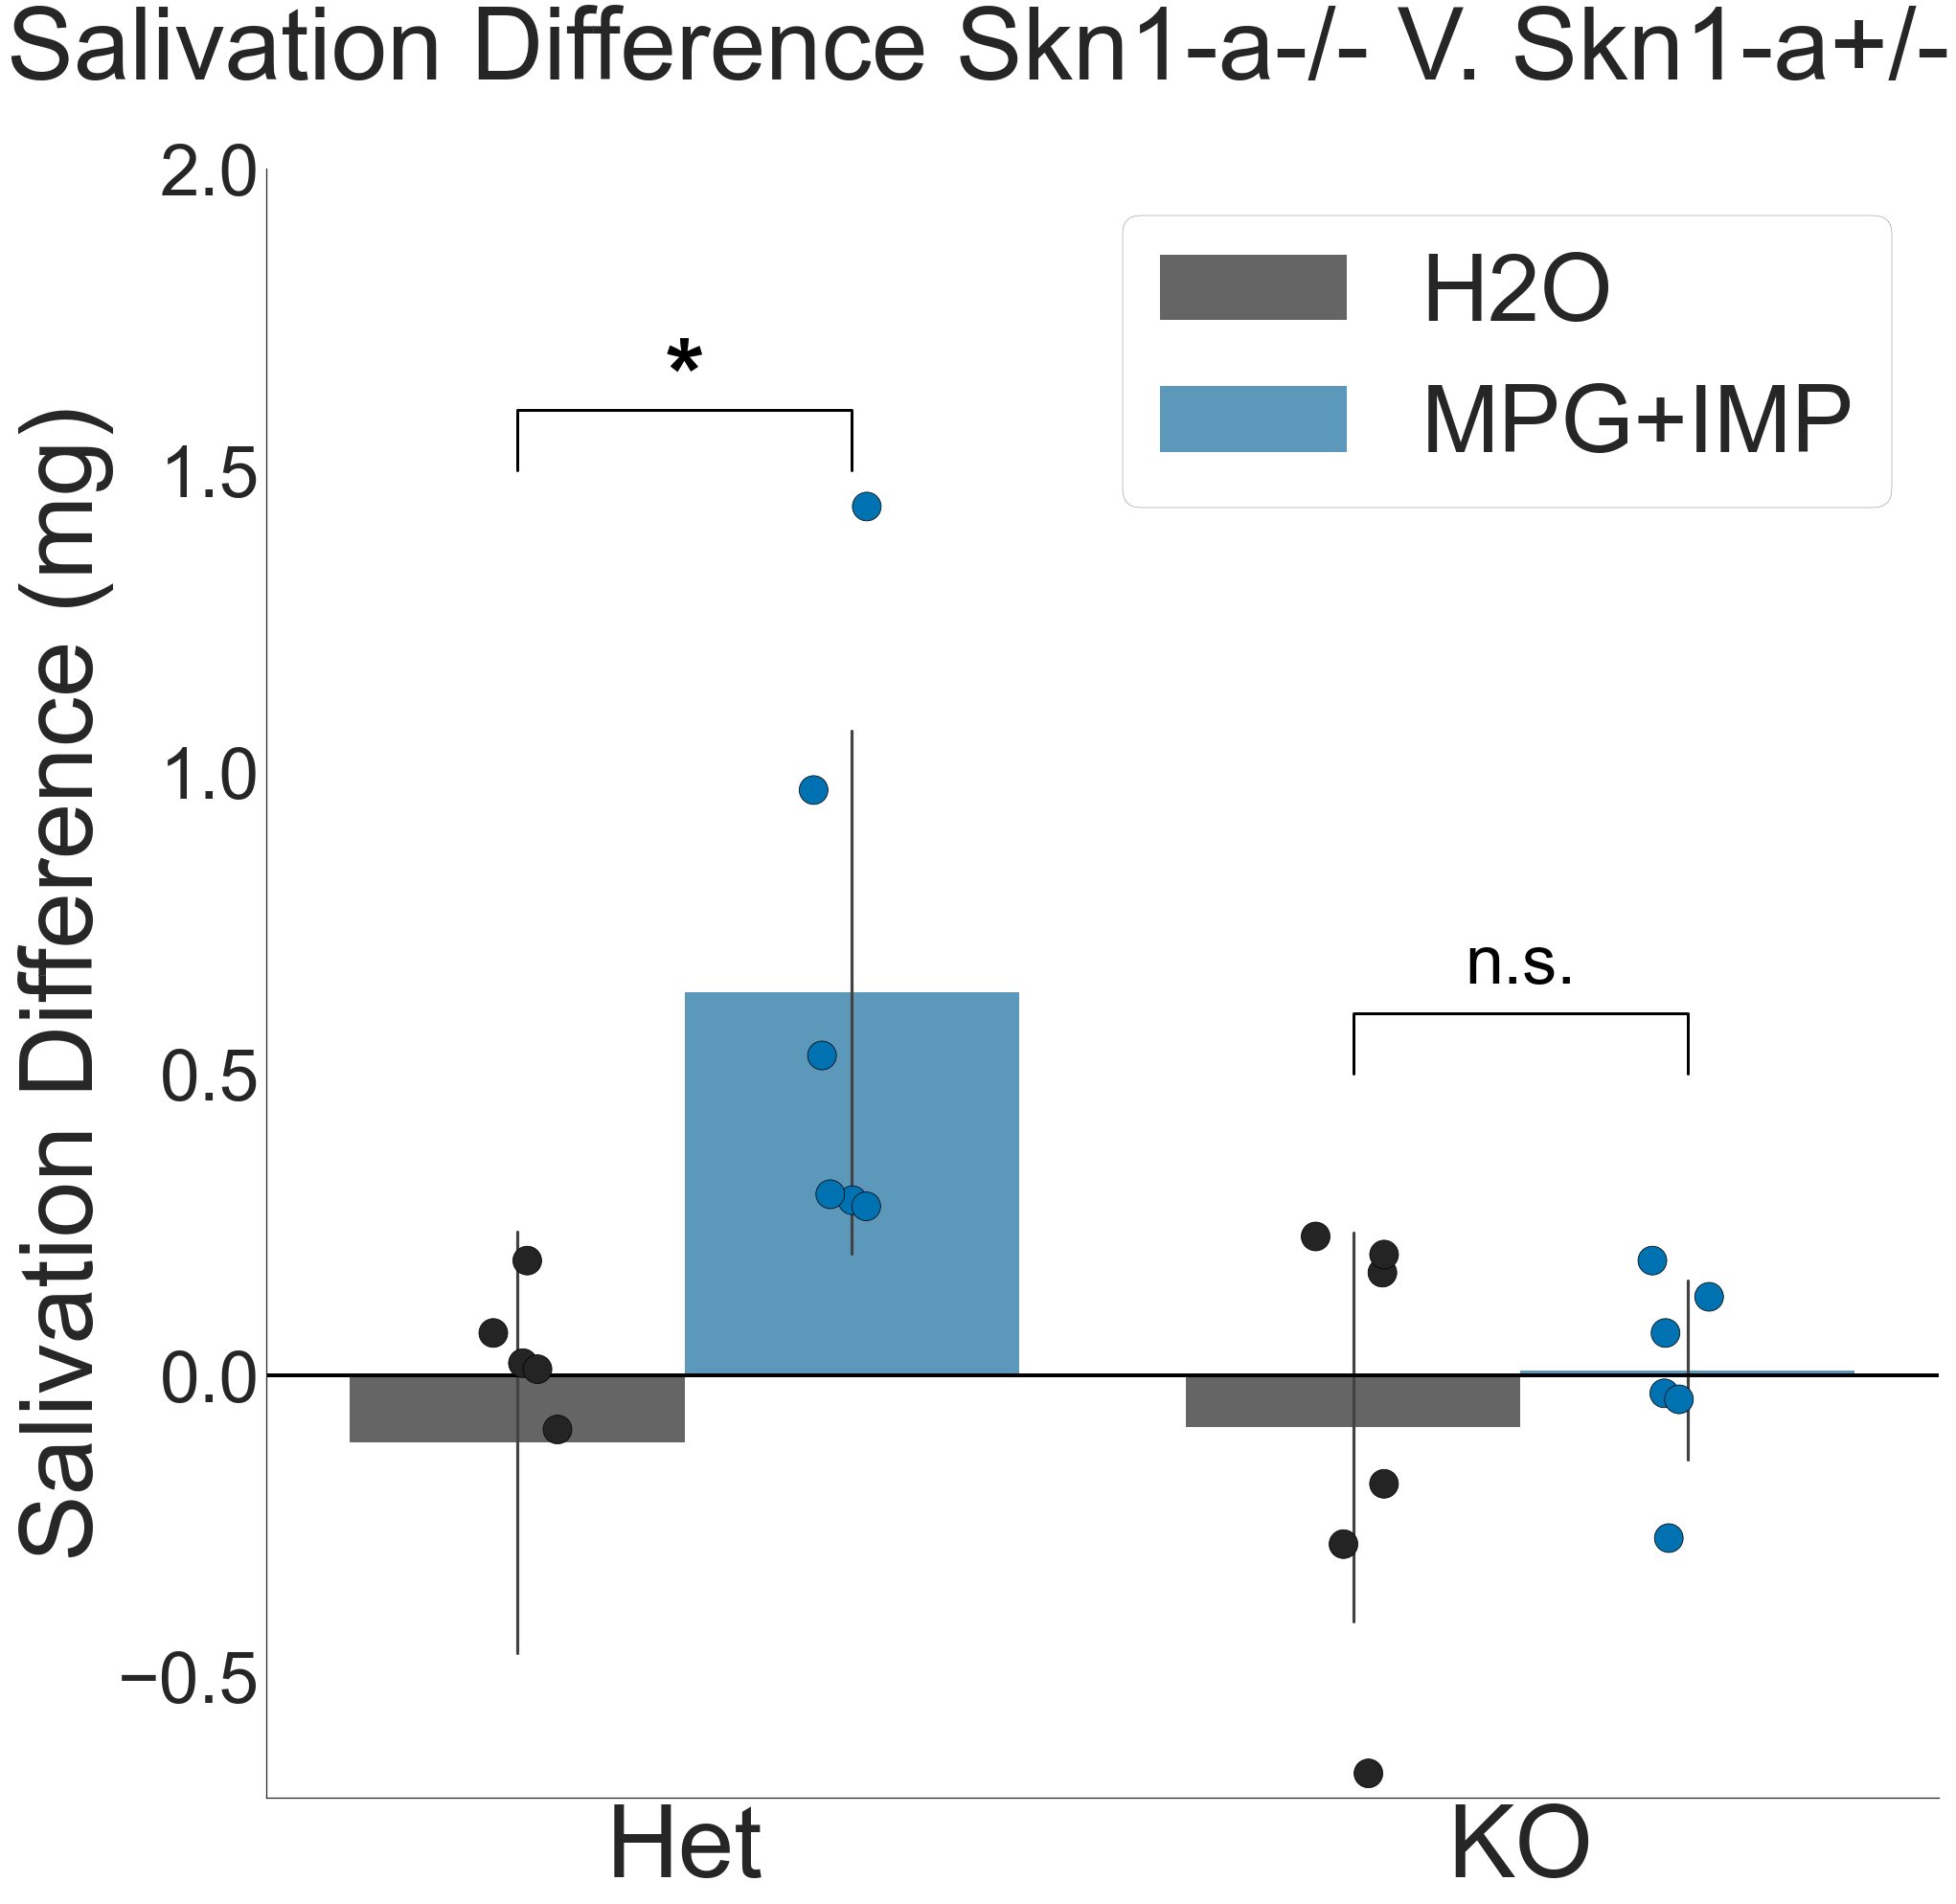

In [48]:
my_jitter = 0.1

my_font = 75
my_hue_order = ['H2O', "MPG+IMP"]
my_order = ['Het','KO']

colors = {'H2O':sns.color_palette('gray')[0], 'MPG+IMP':color(0)}

sns.set(font_scale = 6)

sns.set_style(style = "white")
# Draw the bar chart
fig, ax = plt.subplots(figsize = (30,30))
ax.set_ylim(-0.7, 2.0)
sns.barplot(
    data=by_loc, 
    x="Genotype",
    y="Difference", 
    hue="Tastant", 
    alpha=0.7, 
    #color = 'gray',
    palette = colors,
    ci='sd',
    order = my_order,
    #order = ['Het\nAnterior', 'KO\nAnterior', 'Het\nPosterior', 'KO\nPosterior'],
    hue_order = my_hue_order
)
# Get the legend from just the bar chart
handles, labels = ax.get_legend_handles_labels()

# Draw the stripplot
sns.stripplot(
    data=by_loc, 
    x="Genotype", 
    y="Difference", 
    hue="Tastant", 
    dodge=True, 
    edgecolor="Black", 
    linewidth=.75,
    palette = colors,
    ax=ax,
    jitter = my_jitter,
    size = 30,
    order = my_order,
    #order = ['Het\nAnterior', 'KO\nAnterior', 'Het\nPosterior', 'KO\nPosterior'],
    hue_order = my_hue_order
)

# Remove the old legend
ax.legend_.remove()
# Add just the bar chart legend back
ax.legend(
    handles,
    labels,
    #loc= 9,
    loc = 'best',
    #bbox_to_anchor=(1.25, .5),
    fontsize = my_font*1.3,
    frameon = True,
    edgecolor = 'k',
)

#Set the label for Y axis and remove the label for X axis
ax.set_ylabel('Salivation Difference (mg)', fontsize = my_font*1.4)
ax.set_xlabel('')

#Add Significance Bars
sig_bar = 1.5
comp = 0.2
plt.plot([-0.2,-0.2, comp, comp], [sig_bar, sig_bar+0.1, sig_bar+0.1, sig_bar], linewidth=3, color='k')
plt.text(0, sig_bar+0.1, "*", horizontalalignment='center', size='x-large', color='black', weight='semibold')

sig_bar = 0.5
comp = 1.2
plt.plot([0.8,0.8, comp, comp], [sig_bar, sig_bar+0.1, sig_bar+0.1, sig_bar], linewidth=3, color='k')
plt.text(1, sig_bar+0.15, "n.s.", horizontalalignment='center', size='medium', color='black', weight='normal')

#Set tick sizes, add x axis, title, and remove the spines
sns.despine()
plt.yticks(fontsize = my_font)
plt.xticks(fontsize = my_font*1.4)
plt.axhline(y=0, marker = 'x', color = 'k', linewidth = 4)
plt.gcf().tight_layout(rect=[0, 0.03, 1, 0.95])
plt.gcf().suptitle("Salivation Difference Skn1-a-/- V. Skn1-a+/-",fontsize=my_font*1.4)

plt.savefig("5tast_plots/hetKODiff")

In [9]:
handles

[<BarContainer object of 2 artists>, <BarContainer object of 2 artists>]

In [10]:
labels

['H2O', 'MPG+IMP']

In [11]:
'''my_jitter = 0

my_font = 50

sns.set(font_scale = 4)

sns.set_style(style = "white")
# Draw the bar chart
fig, ax = plt.subplots(figsize = (30,30))
#ax.set_ylim(0,2.3)
sns.barplot(
    data=by_tast, 
    x="Location", 
    y="Difference", 
    hue='Genotype', 
    alpha=0.7, 
    #color = 'gray',
    palette = 'Greys',
    ci='sd',
    #order = ['Het\nAnterior', 'KO\nAnterior', 'Het\nPosterior', 'KO\nPosterior']
)
# Get the legend from just the bar chart
handles, labels = ax.get_legend_handles_labels()

# Draw the stripplot
sns.stripplot(
    data=by_tast, 
    x="Location", 
    y="Difference", 
    hue="Genotype", 
    dodge=True, 
    edgecolor="Black", 
    linewidth=.75,
    palette = 'Greys',
    ax=ax,
    jitter = my_jitter,
    size = 30,
    #order = ['Het\nAnterior', 'KO\nAnterior', 'Het\nPosterior', 'KO\nPosterior']
)

# Remove the old legend
ax.legend_.remove()
# Add just the bar chart legend back
ax.legend(
    handles,
    labels,
    loc= 9,
    bbox_to_anchor=(1.25, .5),
    fontsize = my_font+30
)

ax.set_ylabel('Difference between MPG+IMP and H2O Induced Salivation (mg)', fontsize = my_font)


plt.axhline(y=0, marker = 'x', color = 'k', linewidth = 4)
plt.show()
plt.gcf().tight_layout(rect=[0, 0.03, 1, 0.95])
plt.gcf().suptitle("Salivation Induced in Skn1-KO -/- Animals",fontsize=my_font+10)
plt.gcf().tight_layout(rect=[0, 0.03, 1, 0.95])


'''

'my_jitter = 0\n\nmy_font = 50\n\nsns.set(font_scale = 4)\n\nsns.set_style(style = "white")\n# Draw the bar chart\nfig, ax = plt.subplots(figsize = (30,30))\n#ax.set_ylim(0,2.3)\nsns.barplot(\n    data=by_tast, \n    x="Location", \n    y="Difference", \n    hue=\'Genotype\', \n    alpha=0.7, \n    #color = \'gray\',\n    palette = \'Greys\',\n    ci=\'sd\',\n    #order = [\'Het\nAnterior\', \'KO\nAnterior\', \'Het\nPosterior\', \'KO\nPosterior\']\n)\n# Get the legend from just the bar chart\nhandles, labels = ax.get_legend_handles_labels()\n\n# Draw the stripplot\nsns.stripplot(\n    data=by_tast, \n    x="Location", \n    y="Difference", \n    hue="Genotype", \n    dodge=True, \n    edgecolor="Black", \n    linewidth=.75,\n    palette = \'Greys\',\n    ax=ax,\n    jitter = my_jitter,\n    size = 30,\n    #order = [\'Het\nAnterior\', \'KO\nAnterior\', \'Het\nPosterior\', \'KO\nPosterior\']\n)\n\n# Remove the old legend\nax.legend_.remove()\n# Add just the bar chart legend back\nax.leg

In [12]:
'''my_jitter = 0

my_font = 50

sns.set(font_scale = 4)

sns.set_style(style = "white")
# Draw the bar chart
fig, ax = plt.subplots(figsize = (30,30))
#ax.set_ylim(0,2.3)
sns.barplot(
    data=by_loc, 
    x="Tastant",
    y="Difference", 
    hue="Genotype", 
    alpha=0.7, 
    #color = 'gray',
    palette = 'Greys',
    ci='sd',
    #order = ['Het\nAnterior', 'KO\nAnterior', 'Het\nPosterior', 'KO\nPosterior']
)
# Get the legend from just the bar chart
handles, labels = ax.get_legend_handles_labels()

# Draw the stripplot
sns.stripplot(
    data=by_loc, 
    x="Tastant", 
    y="Difference", 
    hue="Genotype", 
    dodge=True, 
    edgecolor="Black", 
    linewidth=.75,
    palette = 'Greys',
    ax=ax,
    jitter = my_jitter,
    size = 30,
    #order = ['Het\nAnterior', 'KO\nAnterior', 'Het\nPosterior', 'KO\nPosterior']
)

# Remove the old legend
ax.legend_.remove()
# Add just the bar chart legend back
ax.legend(
    handles,
    labels,
    loc= 9,
    bbox_to_anchor=(1.25, .5),
    fontsize = my_font+30
)

ax.set_ylabel('Difference of Posterior-Anterior Salivation (mg)', fontsize = my_font)

plt.axhline(y=0, marker = 'x', color = 'k', linewidth = 4)
plt.show()
plt.gcf().tight_layout(rect=[0, 0.03, 1, 0.95])
plt.gcf().suptitle("Salivation Induced in Skn1-KO -/- Animals",fontsize=my_font+10)
plt.gcf().tight_layout(rect=[0, 0.03, 1, 0.95])

#plt.savefig("5tast_plots/hetKODiff_withUnknownAndCA")'''

'my_jitter = 0\n\nmy_font = 50\n\nsns.set(font_scale = 4)\n\nsns.set_style(style = "white")\n# Draw the bar chart\nfig, ax = plt.subplots(figsize = (30,30))\n#ax.set_ylim(0,2.3)\nsns.barplot(\n    data=by_loc, \n    x="Tastant",\n    y="Difference", \n    hue="Genotype", \n    alpha=0.7, \n    #color = \'gray\',\n    palette = \'Greys\',\n    ci=\'sd\',\n    #order = [\'Het\nAnterior\', \'KO\nAnterior\', \'Het\nPosterior\', \'KO\nPosterior\']\n)\n# Get the legend from just the bar chart\nhandles, labels = ax.get_legend_handles_labels()\n\n# Draw the stripplot\nsns.stripplot(\n    data=by_loc, \n    x="Tastant", \n    y="Difference", \n    hue="Genotype", \n    dodge=True, \n    edgecolor="Black", \n    linewidth=.75,\n    palette = \'Greys\',\n    ax=ax,\n    jitter = my_jitter,\n    size = 30,\n    #order = [\'Het\nAnterior\', \'KO\nAnterior\', \'Het\nPosterior\', \'KO\nPosterior\']\n)\n\n# Remove the old legend\nax.legend_.remove()\n# Add just the bar chart legend back\nax.legend(\n 

In [13]:
het_h2o_ant = df.loc[((df['Genotype']=='Het')&(df['Tastant']=='H2O')&(df['Location']=='Anterior'))]['Saliva (mg)'].tolist()
#het_h2o_pos = df.loc[((df['Genotype']=='Het')&(df['Tastant']=='H2O')&)]

In [14]:
genotypes = set(df['Genotype'].tolist())
genotypes.remove('Unknown')
tastants = set(df['Tastant'].tolist())
tastants.remove('50mM Citric Acid')
locations = set(df['Location'].tolist())

In [15]:
for genotype in genotypes:
    for chem in tastants:
        for place in locations:
            print(f'{genotype}_{chem}_{place} = df.loc[((df[\'Genotype\']==\'{genotype}\')&(df[\'Tastant\']==\'{chem}\')&(df[\'Location\']==\'{place}\'))][\'Saliva (mg)\'].tolist()')

KO_H2O_Anterior = df.loc[((df['Genotype']=='KO')&(df['Tastant']=='H2O')&(df['Location']=='Anterior'))]['Saliva (mg)'].tolist()
KO_H2O_Posterior = df.loc[((df['Genotype']=='KO')&(df['Tastant']=='H2O')&(df['Location']=='Posterior'))]['Saliva (mg)'].tolist()
KO_MPG+IMP_Anterior = df.loc[((df['Genotype']=='KO')&(df['Tastant']=='MPG+IMP')&(df['Location']=='Anterior'))]['Saliva (mg)'].tolist()
KO_MPG+IMP_Posterior = df.loc[((df['Genotype']=='KO')&(df['Tastant']=='MPG+IMP')&(df['Location']=='Posterior'))]['Saliva (mg)'].tolist()
Het_H2O_Anterior = df.loc[((df['Genotype']=='Het')&(df['Tastant']=='H2O')&(df['Location']=='Anterior'))]['Saliva (mg)'].tolist()
Het_H2O_Posterior = df.loc[((df['Genotype']=='Het')&(df['Tastant']=='H2O')&(df['Location']=='Posterior'))]['Saliva (mg)'].tolist()
Het_MPG+IMP_Anterior = df.loc[((df['Genotype']=='Het')&(df['Tastant']=='MPG+IMP')&(df['Location']=='Anterior'))]['Saliva (mg)'].tolist()
Het_MPG+IMP_Posterior = df.loc[((df['Genotype']=='Het')&(df['Tastant']=='MP

In [16]:
KO_MPGIMP_Anterior = df.loc[((df['Genotype']=='KO')&(df['Tastant']=='MPG+IMP')&(df['Location']=='Anterior'))]['Saliva (mg)'].tolist()
KO_MPGIMP_Posterior = df.loc[((df['Genotype']=='KO')&(df['Tastant']=='MPG+IMP')&(df['Location']=='Posterior'))]['Saliva (mg)'].tolist()
KO_H2O_Anterior = df.loc[((df['Genotype']=='KO')&(df['Tastant']=='H2O')&(df['Location']=='Anterior'))]['Saliva (mg)'].tolist()
KO_H2O_Posterior = df.loc[((df['Genotype']=='KO')&(df['Tastant']=='H2O')&(df['Location']=='Posterior'))]['Saliva (mg)'].tolist()
Het_MPGIMP_Anterior = df.loc[((df['Genotype']=='Het')&(df['Tastant']=='MPG+IMP')&(df['Location']=='Anterior'))]['Saliva (mg)'].tolist()
Het_MPGIMP_Posterior = df.loc[((df['Genotype']=='Het')&(df['Tastant']=='MPG+IMP')&(df['Location']=='Posterior'))]['Saliva (mg)'].tolist()
Het_H2O_Anterior = df.loc[((df['Genotype']=='Het')&(df['Tastant']=='H2O')&(df['Location']=='Anterior'))]['Saliva (mg)'].tolist()
Het_H2O_Posterior = df.loc[((df['Genotype']=='Het')&(df['Tastant']=='H2O')&(df['Location']=='Posterior'))]['Saliva (mg)'].tolist()

In [17]:
data = by_loc['Difference'].tolist()

stat, p = stats.shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.905, p=0.027


In [18]:
data = by_loc['Difference'].tolist()

stat, p = stats.normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=7.543, p=0.023


In [19]:
result = stats.anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.982
15.000: 0.513, data does not look normal (reject H0)
10.000: 0.584, data does not look normal (reject H0)
5.000: 0.701, data does not look normal (reject H0)
2.500: 0.817, data does not look normal (reject H0)
1.000: 0.972, data does not look normal (reject H0)


In [20]:
to_hist= by_loc[['Mouse', 'Genotype', 'Tastant', 'Location', 'Difference']]
to_hist.head()

,Mouse,Genotype,Tastant,Location,Difference
2,17,KO,H2O,Anterior,-0.66
4,17,KO,MPG+IMP,Anterior,-0.03
8,18,KO,H2O,Anterior,0.17
10,18,KO,MPG+IMP,Anterior,-0.27
14,19,Het,H2O,Anterior,0.02


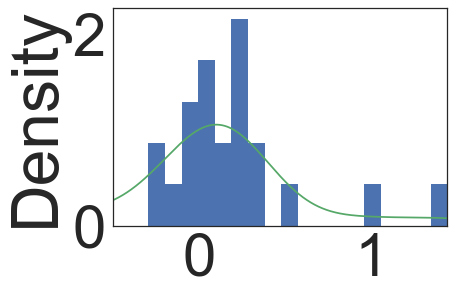

In [21]:


fig, ax = plt.subplots(figsize = (6,4))

# Plots #
    # Plot histogram
to_hist.plot.hist(density = True, bins = 24, ax=ax) # change density to true, because KDE uses density
    # Plot KDE
to_hist.plot.kde(ax=ax)

# X #
#ax.set_xlabel("Average Price ($)")
ax.set_xlim(-0.5,1.44)

# Y #
#ax.set_ylim(0, 1)

# Overall #
#ax.set_title("Avocado Prices in U.S. Markets")

ax.get_legend().remove()

#plt.savefig('skn1_Diff_Distribution', )

In [22]:
max(to_hist['Difference'])

1.4400000000000002

In [23]:
by_loc

,Mouse,Genotype,Tastant,Location,Posterior,Anterior,Difference
2,17,KO,H2O,Anterior,0.29,0.95,-0.66
4,17,KO,MPG+IMP,Anterior,0.00,0.03,-0.03
8,18,KO,H2O,Anterior,0.53,0.36,0.17
10,18,KO,MPG+IMP,Anterior,0.11,0.38,-0.27
14,19,Het,H2O,Anterior,0.91,0.89,0.02
16,19,Het,MPG+IMP,Anterior,1.79,1.26,0.53
20,20,KO,H2O,Anterior,0.30,0.48,-0.18
22,20,KO,MPG+IMP,Anterior,0.25,0.12,0.13
26,21,Het,H2O,Anterior,1.11,0.92,0.19
28,21,Het,MPG+IMP,Anterior,1.34,1.05,0.29


In [24]:
by_tast.sort_values('Genotype')

,Mouse,Genotype,Location,H2O,Umami,Difference
39,23,Het,Posterior,0.52,0.82,0.30
69,22m,Het,Posterior,0.35,1.01,0.66
68,22m,Het,Anterior,1.22,0.73,-0.49
14,19,Het,Anterior,0.89,1.26,0.37
15,19,Het,Posterior,0.91,1.79,0.88
57,26,Het,Posterior,0.44,2.78,2.34
26,21,Het,Anterior,0.92,1.05,0.13
27,21,Het,Posterior,1.11,1.34,0.23
38,23,Het,Anterior,0.61,0.52,-0.09
56,26,Het,Anterior,0.43,1.81,1.38


In [25]:
by_loc

,Mouse,Genotype,Tastant,Location,Posterior,Anterior,Difference
2,17,KO,H2O,Anterior,0.29,0.95,-0.66
4,17,KO,MPG+IMP,Anterior,0.00,0.03,-0.03
8,18,KO,H2O,Anterior,0.53,0.36,0.17
10,18,KO,MPG+IMP,Anterior,0.11,0.38,-0.27
14,19,Het,H2O,Anterior,0.91,0.89,0.02
16,19,Het,MPG+IMP,Anterior,1.79,1.26,0.53
20,20,KO,H2O,Anterior,0.30,0.48,-0.18
22,20,KO,MPG+IMP,Anterior,0.25,0.12,0.13
26,21,Het,H2O,Anterior,1.11,0.92,0.19
28,21,Het,MPG+IMP,Anterior,1.34,1.05,0.29


In [26]:
data = by_loc['Difference'].tolist()
data

[-0.6599999999999999,
 -0.03,
 0.17000000000000004,
 -0.27,
 0.020000000000000018,
 0.53,
 -0.18,
 0.13,
 0.19000000000000006,
 0.29000000000000004,
 -0.08999999999999997,
 0.29999999999999993,
 0.06999999999999998,
 1.4400000000000002,
 0.23,
 0.07,
 0.010000000000000009,
 0.9699999999999998,
 -0.27999999999999997,
 -0.03999999999999998,
 -0.87,
 0.28,
 0.19999999999999996,
 0.19]

In [27]:
result = stats.anderson(data)

In [28]:
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.982
15.000: 0.513, data does not look normal (reject H0)
10.000: 0.584, data does not look normal (reject H0)
5.000: 0.701, data does not look normal (reject H0)
2.500: 0.817, data does not look normal (reject H0)
1.000: 0.972, data does not look normal (reject H0)


In [29]:
by_loc.sort_values('Tastant')
diff_data = by_loc.loc[by_loc['Tastant']=='H2O'][['Mouse','Genotype','Difference']]
diff_data = diff_data.rename({'Difference':'H2O'}, axis = 1)
diff_data['MPG+IMP'] = by_loc.loc[by_loc['Tastant']=='MPG+IMP']['Difference'].tolist()
diff_data = diff_data.sort_values('Genotype')
diff_data = diff_data.T
diff_data

,14,26,38,44,56,68,2,8,20,50,62,74
Mouse,19,21,23,24,26,22m,17,18,20,25,27,23m
Genotype,Het,Het,Het,Het,Het,Het,KO,KO,KO,KO,KO,KO
H2O,0.02,0.19,-0.09,0.07,0.01,-0.87,-0.66,0.17,-0.18,0.23,-0.28,0.2
MPG+IMP,0.53,0.29,0.3,1.44,0.97,0.28,-0.03,-0.27,0.13,0.07,-0.04,0.19


In [30]:
diff_data.to_excel("skn1_difference_data.xlsx")

In [31]:
?df.to_excel

In [32]:
diff_data.iloc[3].tolist()

[0.53,
 0.29000000000000004,
 0.29999999999999993,
 1.4400000000000002,
 0.9699999999999998,
 0.28,
 -0.03,
 -0.27,
 0.13,
 0.07,
 -0.03999999999999998,
 0.19]

In [33]:
for_durbin = by_loc.loc[by_loc['Genotype']=='KO'][['Mouse', 'Tastant', 'Difference']]
for_durbin = for_durbin.rename({'Difference':'KO'}, axis = 1)
for_durbin['Het'] = by_loc.loc[by_loc['Genotype']=='Het']['Difference'].tolist()
for_durbin

,Mouse,Tastant,KO,Het
2,17,H2O,-0.66,0.02
4,17,MPG+IMP,-0.03,0.53
8,18,H2O,0.17,0.19
10,18,MPG+IMP,-0.27,0.29
20,20,H2O,-0.18,-0.09
22,20,MPG+IMP,0.13,0.30
50,25,H2O,0.23,0.07
52,25,MPG+IMP,0.07,1.44
62,27,H2O,-0.28,0.01
64,27,MPG+IMP,-0.04,0.97


In [34]:
for_durbin['KO'].tolist()

[-0.6599999999999999,
 -0.03,
 0.17000000000000004,
 -0.27,
 -0.18,
 0.13,
 0.23,
 0.07,
 -0.27999999999999997,
 -0.03999999999999998,
 0.19999999999999996,
 0.19]

In [35]:
for_durbin['Het'].tolist()

[0.020000000000000018,
 0.53,
 0.19000000000000006,
 0.29000000000000004,
 -0.08999999999999997,
 0.29999999999999993,
 0.06999999999999998,
 1.4400000000000002,
 0.010000000000000009,
 0.9699999999999998,
 -0.87,
 0.28]

In [36]:
j = 'H2O'
k = 'MPG+IMP'
thing = j+', '+k
thing
test = [thing] *6
test

['H2O, MPG+IMP',
 'H2O, MPG+IMP',
 'H2O, MPG+IMP',
 'H2O, MPG+IMP',
 'H2O, MPG+IMP',
 'H2O, MPG+IMP']

In [37]:
print(j,',',k)

H2O , MPG+IMP


In [38]:
k

'MPG+IMP'

In [39]:
by_loc.groupby(['Genotype','Tastant', 'Location']).mean()

Posterior  Anterior  Difference
Genotype Tastant Location                                 
Het      H2O     Anterior   0.605000  0.716667   -0.111667
         MPG+IMP Anterior   1.653333  1.018333    0.635000
KO       H2O     Anterior   0.343333  0.430000   -0.086667
         MPG+IMP Anterior   0.241667  0.233333    0.008333

In [40]:
by_loc.groupby(['Genotype', 'Tastant']).std()

Posterior  Anterior  Difference
Genotype Tastant                                 
Het      H2O       0.328801  0.361976    0.382540
         MPG+IMP   0.744571  0.467992    0.475089
KO       H2O       0.185221  0.269963    0.353025
         MPG+IMP   0.165821  0.132615    0.163024

In [41]:
?df.to_excel()

In [42]:
by_loc.to_excel('salivation_data_for_distribution.xlsx', sheet_name = 'Skn1')

In [43]:
by_loc = by_loc.drop('index', axis = 1)
by_loc

KeyError: "['index'] not found in axis"

In [ ]:
by_loc.groupby(['Genotype', 'Tastant']).mean()

In [ ]:
by_loc.groupby(['Genotype', 'Tastant']).std()

In [ ]:
x = by_loc.loc[(by_loc['Genotype']=='Het')&(by_loc['Tastant']=='H2O')]['Difference'].tolist()
y = by_loc.loc[(by_loc['Genotype']=='Het')&(by_loc['Tastant']=='MPG+IMP')]['Difference'].tolist()

stats.ttest_rel(x,y)

In [ ]:
a = by_loc.loc[(by_loc['Genotype']=='KO')&(by_loc['Tastant']=='MPG+IMP')]['Difference'].tolist()
b = by_loc.loc[(by_loc['Genotype']=='Het')&(by_loc['Tastant']=='MPG+IMP')]['Difference'].tolist()

stats.ttest_ind(a,b)

In [ ]:
ko_h2o =by_loc.loc[(by_loc['Genotype']=='KO')&(by_loc['Tastant']=='H2O')]['Difference'].tolist()
ko_mpg = by_loc.loc[(by_loc['Genotype']=='KO')&(by_loc['Tastant']=='MPG+IMP')]['Difference'].tolist()

stats.ttest_rel(ko_h2o, ko_mpg)

In [ ]:
b

In [ ]:
x

In [ ]:
y

In [ ]:
a = by_loc.loc[(by_loc['Genotype']=='KO')&(by_loc['Tastant']=='H2O')]['Difference'].tolist()
b = by_loc.loc[(by_loc['Genotype']=='Het')&(by_loc['Tastant']=='H2O')]['Difference'].tolist()

stats.ttest_rel(a,b)

In [ ]:
a = by_loc.loc[(by_loc['Genotype']=='KO')&(by_loc['Tastant']=='H2O')]['Difference'].tolist()
b = by_loc.loc[(by_loc['Genotype']=='Het')&(by_loc['Tastant']=='H2O')]['Difference'].tolist()

In [ ]:
ko_h2o = to_plot.loc[(to_plot['Genotype']=='KO')&(to_plot['Tastant']=='H2O')]['Saliva (mg)']
het_h2o = to_plot.loc[(to_plot['Genotype']=='Het')&(to_plot['Tastant']=='H2O')]['Saliva (mg)']

stats.ttest_rel(ko_h2o, het_h2o)

In [ ]:
to_plot

In [ ]:
data = to_plot['Saliva (mg)']

stat, p = stats.shapiro(data)
p

In [ ]:
stat, p = stats.normaltest(data)
p

In [ ]:
data = to_plot.loc[to_plot['Tastant']=='H2O']['Saliva (mg)']

stats.shapiro(data)

In [ ]:
data = by_loc.loc[by_loc['Genotype']=='KO']['Difference']
stats.shapiro(data)

In [ ]:
to_plot

In [ ]:
def get_group(df, gen, tast, loc):
    return df.loc[(df['Genotype']==gen)&(df['Tastant']==tast)&(df['Location']==loc)]['Saliva (mg)'].tolist()

In [ ]:
ko_h2o_pos = to_plot.loc[(to_plot['Genotype']=='KO')&(to_plot['Tastant']=='H2O')&(to_plot['Location']=='Posterior')]
ko_mpg = to_plot.loc[(to_plot['Genotype']=='KO')&(to_plot['Tastant']=='MPG+IMP')]
het_h2o = to_plot.loc[(to_plot['Genotype']=='Het')&(to_plot['Tastant']=='H2O')]
het_mpg = to_plot.loc[(to_plot['Genotype']=='Het')&(to_plot['Tastant']=='MPG+IMP')]

ko_h2o = to_plot.loc[(to_plot['Genotype']=='KO')&(to_plot['Tastant']=='H2O')]
ko_mpg = to_plot.loc[(to_plot['Genotype']=='KO')&(to_plot['Tastant']=='MPG+IMP')]
het_h2o = to_plot.loc[(to_plot['Genotype']=='Het')&(to_plot['Tastant']=='H2O')]
het_mpg = to_plot.loc[(to_plot['Genotype']=='Het')&(to_plot['Tastant']=='MPG+IMP')]

In [ ]:
test = by_loc.copy(deep = True)
test = test[['Mouse', 'Genotype', 'Tastant', 'Difference']]
test
test['Gen+Tast'] = test['Genotype'] + test['Tastant']
test

In [ ]:
label = 'H2O'
label[0:3]

In [ ]:
tukey = pairwise_tukeyhsd(endog=test['Difference'],
                          groups=test['Gen+Tast'],
                          alpha=0.05)

In [ ]:
tp = to_plot.copy(deep=True)

genos = ['KO', 'Het']
tastants = ['H2O', 'MPG+IMP']
locations = ['Posterior', 'Anterior']

groups = {}

for gen in genos:
    for tast in tastants:
        for loc in locations:
            label = gen+tast[0:3]+loc[0:3]
            groups[label] = get_group(tp, gen, tast, loc)
groups

In [ ]:
def get_p(data):
    stat, p = stats.shapiro(data)
    return p

In [ ]:
for key, value in groups.items():
    stat, p = stats.shapiro(value)
    print(f'{key} shapiro p= {p}')

In [ ]:
for key, value in groups:
    stat, p = stats.shapiro(value['Saliva (mg)'])
    print(f'{key} shapiro p = {p}')

In [ ]:
print(tukey)